<a href="https://colab.research.google.com/github/SaraElwatany/Agglomerative-Clustering-Implementation-From-Scratch/blob/main/Assignment_4_Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports**

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## **Data Loading**

In [ ]:
# Load the Iris Dataset
dataset = load_iris()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
iris_df['target'] = dataset.target

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = iris_df.drop(['sepal width (cm)', 'petal width (cm)', 'target'], axis=1)
Y = iris_df['target']

no_classes = len(Y.unique())
no_samples = len(Y)
feature_names = ['sepal length (cm)', 'petal length (cm)']
target_names = dataset.target_names

In [ ]:
X

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
no_classes

3

In [ ]:
feature_names

['sepal length (cm)', 'petal length (cm)']

In [ ]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

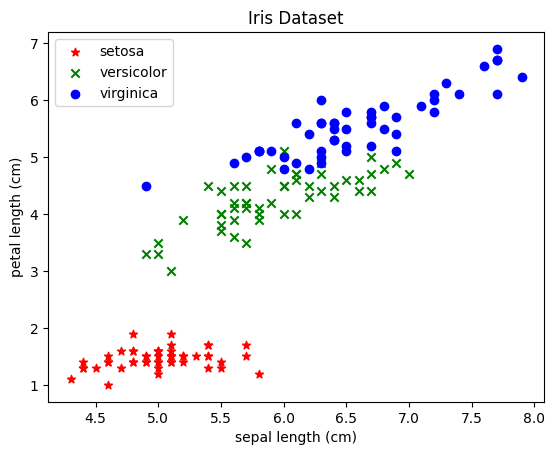

In [ ]:
# Plot the Iris Dataset (using only 2 features)
color_map = ['r', 'g', 'b']
markers = ['*', 'x', 'o']
labels = ['setosa', 'versicolor', 'virginica']

for category in range(0, no_classes):
  plt.scatter(X[Y == category]['sepal length (cm)'], X[Y == category]['petal length (cm)'], c=color_map[category], marker=markers[category], label=labels[category])

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.title('Iris Dataset')
plt.show()

### **Helper Functions**

In [ ]:
# Function to get the Euclidean Distance between 2 datapoints
def euc_distance(pt1, pt2):
  return math.dist(pt1, pt2)

In [ ]:
# Function to get the Ward Distance between 2 Clusters
def ward_distance(x, cluster_1, cluster_2):
  # Initialize ward distance
  ward_distance, temp_distance = 0, 0
  seperate_clusters = [cluster_1, cluster_2]
  # Merge the 2 clusters into one cluster
  merged_clusters = [index for cluster in seperate_clusters for index in cluster]

  # Compute Ward Distance
  # Get the centroid for seperate clusters
  for cluster in seperate_clusters:
    # Get the datapoints' value corresponding to the stored data indicies (indicies of rows in the dataframe) in each cluster
    cluster_data = X.iloc[cluster]
    # Get the centroid
    cluster_centroid = np.mean(cluster_data, axis=0)
    # Compute the variance for each cluster
    for datapoint in np.array(cluster_data):
      ward_distance += euc_distance(datapoint, cluster_centroid)**2

  # Get the datapoints' value corresponding to the stored data indicies (indicies of rows in the dataframe) in the merged cluster
  merged_data = X.iloc[merged_clusters]
  # Get the centroid for merged clusters
  merged_centroid = np.mean(merged_data, axis=0)
  # Compute the variance for the merged clusters
  for datapoint in np.array(merged_data):
      temp_distance += euc_distance(datapoint, merged_centroid)**2
  ward_distance -= temp_distance  # Subtract the variance from the merged clusters
  return np.abs(ward_distance)  # Return Ward Distance

In [ ]:
# Function that performs Heirarchical Clustering (takes the input features => x , desired number of clusters and the linkage method)
def agglomerative_heirarchical_clustering(x, no_clusters=3, linkage_method = 'single_link'):

  # Initially each sample/datapoint is represented by a single cluster
  clusters = [[sample] for sample in range(0, no_samples)]

  new_cluster, clusters_indicies = [], []
  distance = 0

  # Cast the datapoints to array for easier manipulations
  data_points = np.array(x)

  # Iterate till you reach the desired number of clusters
  while len(clusters) > no_clusters:

      # Initialize large distance
      min_distance = 200000

      # For each cluster get the closest cluster to it
      for cluster_1 in range(0, len(clusters)):
        for cluster_2 in range(cluster_1, len(clusters)):

          # Skip if you encountered the same clusters
          if cluster_1 == cluster_2:
            pass

          else:

            # If the linkage method was based on single link
            if linkage_method == 'single_link':

              # Initialize large distance
              distance = 200000
              # Get the distance between the 2 clusters
              for index_1 in clusters[cluster_1]:
                for index_2 in clusters[cluster_2]:

                  single_link_dist = euc_distance(data_points[index_1, :], data_points[index_2, :])
                  if single_link_dist < distance:
                    distance = single_link_dist

            # If the linkage method was based on ward distance between clusters
            elif linkage_method == 'ward_distance':
              # Get the ward distance between the 2 clusters
              distance = ward_distance(x, clusters[cluster_1], clusters[cluster_2])

            # Update the minimum distance if the calculated distance satisfies the requirement
            if (distance <= min_distance):   #  and (distance!=0)
              min_distance = distance
              # update the content of new cluster to include the new datapoint/points
              new_cluster = [clusters[cluster_1], clusters[cluster_2]]
              clusters_indicies = [cluster_1, cluster_2]

      # Merge the final clusters
      for index in new_cluster[1]:
        new_cluster[0].append(index)

      # Update the clusters list with the newly merged clusters
      clusters[clusters_indicies[0]] = new_cluster[0]
      clusters.pop(clusters_indicies[1])

  return clusters   # return the final clusters

## **Single Link Method**

In [ ]:
single_link_3_clusters = agglomerative_heirarchical_clustering(X, no_clusters=3, linkage_method = 'single_link')
single_link_4_clusters = agglomerative_heirarchical_clustering(X, no_clusters=4, linkage_method = 'single_link')
single_link_5_clusters = agglomerative_heirarchical_clustering(X, no_clusters=5, linkage_method = 'single_link')
#print(f'Formed Single Link Clusters with length {len(single_link_clusters)}: ', single_link_clusters)

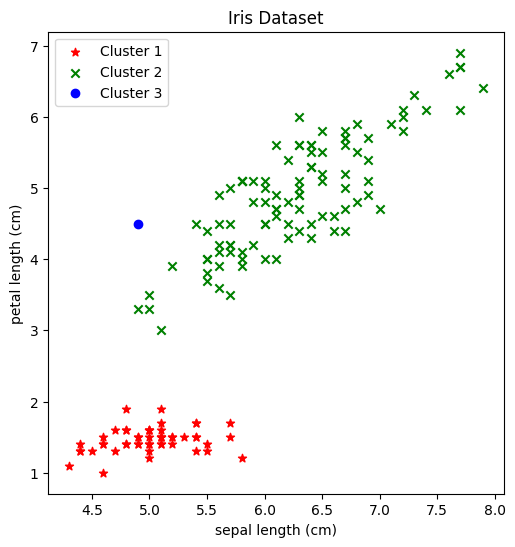

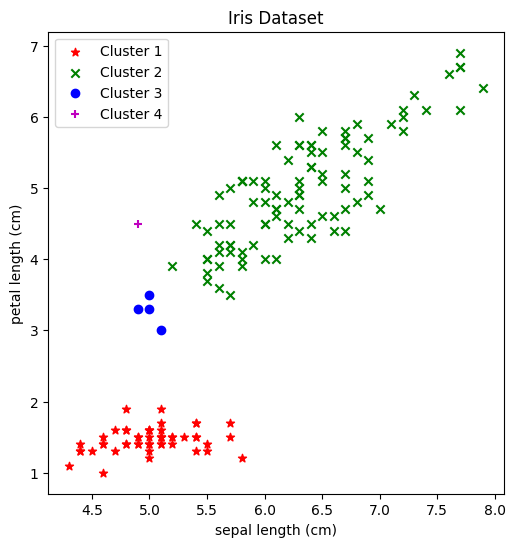

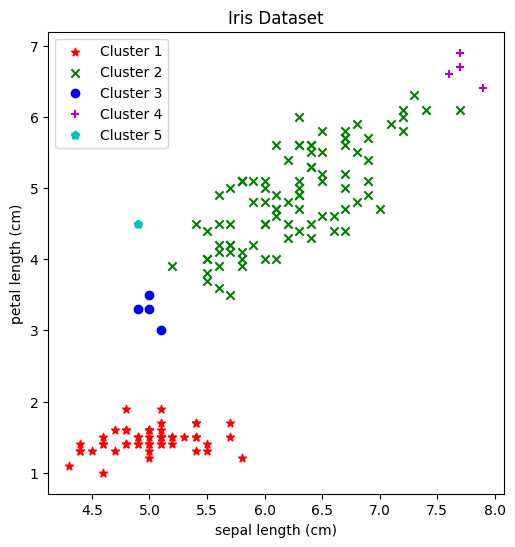

In [ ]:
color_map = ['r', 'g', 'b', 'm', 'c']
markers = ['*', 'x', 'o', '+', 'p']
plots = [single_link_3_clusters, single_link_4_clusters, single_link_5_clusters]


for plot in range(0, 3):
  plt.figure(figsize=(20,6))
  plt.subplot(1, 3, plot+1)
  curr_clusters = plots[plot]
  labels = [f'Cluster {i+1}' for i in range(0, len(curr_clusters))]
  for category in range(0, len(curr_clusters)):
    plt.scatter(X.iloc[curr_clusters[category], [0]], X.iloc[curr_clusters[category], [1]], c=color_map[category], marker=markers[category], label=labels[category])

  plt.xlabel('sepal length (cm)')
  plt.ylabel('petal length (cm)')
  plt.title('Iris Dataset')
  plt.legend()
  plt.show()

### **Comments**

-  Since Single link method is based on choosing the minimum distance between the objects of 2 clusters it will be very **Sensitive to noise and outliers** and this can be observed especially in the first plot, where choosing 3 clusters, resulted in the formation of a cluster consisting of a single point, moreover the clusters formed tends to be **long & elongated**.

- This can be observed in all plots where setosa was clearly represented by a single cluster and not a single overlap between its points and other clusters, unlike virginica & versicolor with huge overlaps between them (very bad clustering).

- Not the best approach to take for the Iris Dataset.

### **Ward Distance Method**

In [ ]:
ward_3_clusters = agglomerative_heirarchical_clustering(X, no_clusters=3, linkage_method = 'ward_distance')
ward_4_clusters = agglomerative_heirarchical_clustering(X, no_clusters=4, linkage_method = 'ward_distance')
ward_5_clusters = agglomerative_heirarchical_clustering(X, no_clusters=5, linkage_method = 'ward_distance')
#print(f'Formed Ward Clusters with length {len(ward_clusters)}: ', ward_clusters)

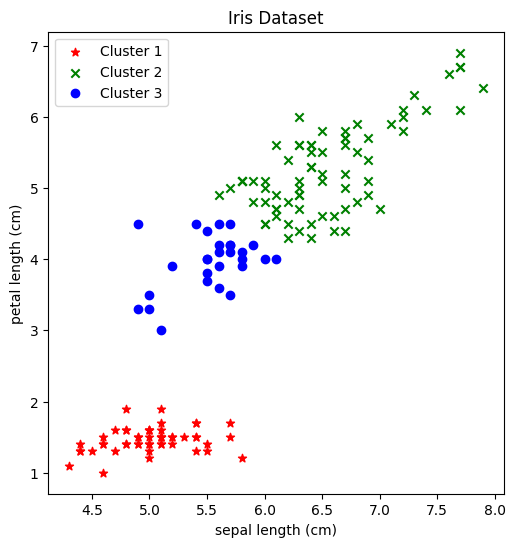

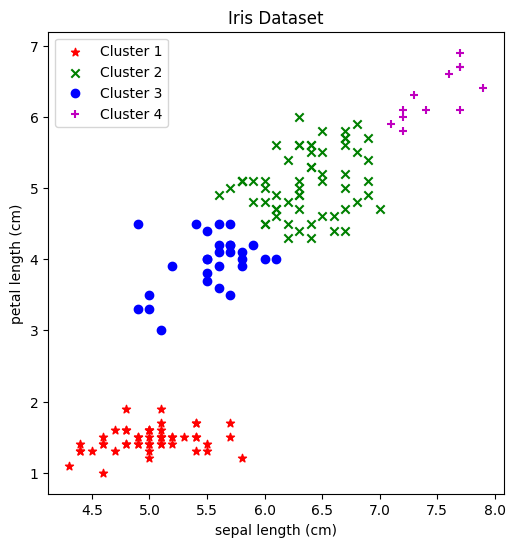

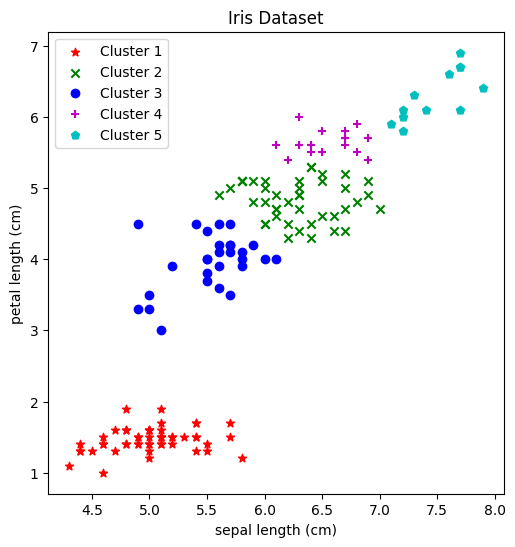

In [ ]:
color_map = ['r', 'g', 'b', 'm', 'c']
markers = ['*', 'x', 'o', '+', 'p']
plots = [ward_3_clusters, ward_4_clusters, ward_5_clusters]


for plot in range(0, 3):
  plt.figure(figsize=(20,6))
  plt.subplot(1, 3, plot+1)
  curr_clusters = plots[plot]
  labels = [f'Cluster {i+1}' for i in range(0, len(curr_clusters))]
  for category in range(0, len(curr_clusters)):
    plt.scatter(X.iloc[curr_clusters[category], [0]], X.iloc[curr_clusters[category], [1]], c=color_map[category], marker=markers[category], label=labels[category])

  plt.xlabel('sepal length (cm)')
  plt.ylabel('petal length (cm)')
  plt.title('Iris Dataset')
  plt.legend()
  plt.show()

### **Comments**

-  Since Ward Distance method aims to minimize the increase in within-cluster variance when merging clusters it will be **Less susceptible to noise and outliers** and this can be observed in all plots, especially in the first plot where choosing 3 clusters, resulted in the formation of exactly the same original clusters, moreover the clusters formed tends to be **globular in shape (resembeling a sphere)**.

- A very good approach to take when clustering the Iris Dataset.